### Project Summary:
#### Problem Statement:
1. To build a trained model which can predict the employee performance based on factors as inputs. 
2. To Provide Recommendations to improve the employee performance based on insights from analysis.

#### Training Model:
1. It is a classification problem. 
2. Implemented XGBOOST Machine learning algorithm because of the inconsistency in the data.
3. Dropped the Employee Number column from the feature variables because there is no relation between the Employee number and performance Rating.

#### Tools and Technologies:
1. Python 3 - Programming language. 
2. Jupyter notebook – Web application which allows to create and Share documents that contain live code.
3. Machine learning.

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


### Reading the data 

In [2]:
data = pd.read_csv("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv")

###  Department wise Performance
1. X_axis represents the Performance Rating of Employees.
2. Y_axis represents the Frequency of the Employees in that particular Performance Rating.
3. Finance department has more employees whose performance rating is '2'.

Text(0.5,1,'Finance Department')

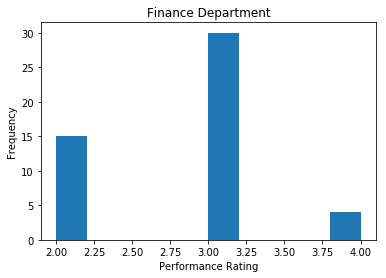

In [7]:
ax = data[data["EmpDepartment"] == "Finance"]["PerformanceRating"].plot(kind="hist")
ax.set_xlabel("Performance Rating")
ax.set_title("Finance Department")

Text(0.5,1,'Data Science Department')

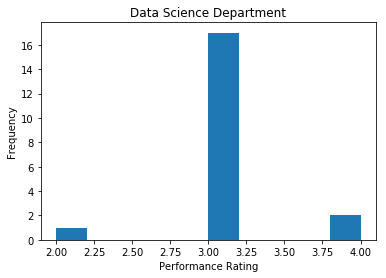

In [8]:
ax = data[data["EmpDepartment"] == "Data Science"]["PerformanceRating"].plot(kind="hist")
ax.set_xlabel("Performance Rating")
ax.set_title("Data Science Department")

Text(0.5,1,'HR Department')

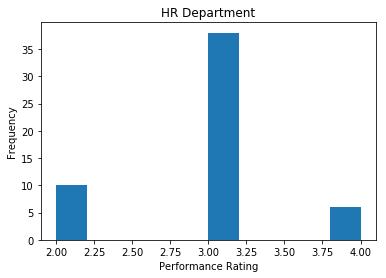

In [9]:
ax = data[data["EmpDepartment"] == "Human Resources"]["PerformanceRating"].plot(kind="hist")
ax.set_xlabel("Performance Rating")
ax.set_title("HR Department")

Text(0.5,1,'R & D Department')

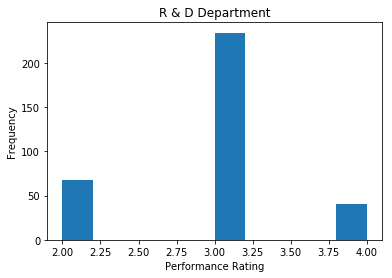

In [10]:
ax = data[data["EmpDepartment"] == "Research & Development"]["PerformanceRating"].plot(kind="hist")
ax.set_xlabel("Performance Rating")
ax.set_title("R & D Department")

Text(0.5,1,'Sales Department')

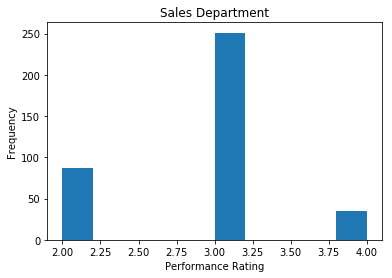

In [11]:
ax = data[data["EmpDepartment"] == "Sales"]["PerformanceRating"].plot(kind="hist")
ax.set_xlabel("Performance Rating")
ax.set_title("Sales Department")

Text(0.5,1,'Development Department')

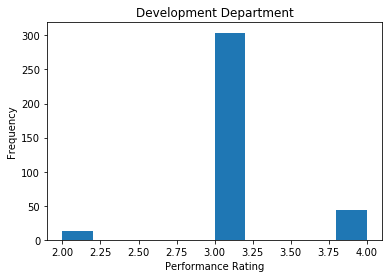

In [12]:
ax = data[data["EmpDepartment"] == "Development"]["PerformanceRating"].plot(kind="hist")
ax.set_xlabel("Performance Rating")
ax.set_title("Development Department")

### Top 3 important factors effecting the Performance Rating
1. Employee Envioronment Satisfaction
2. Employee last salary Hike Percent
3. Years since last promotion

In [13]:
correlation = data.corr()['PerformanceRating'][:].abs().sort_values(ascending = False)

In [14]:
correlation

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion         0.167629
ExperienceYearsInCurrentRole    0.147638
EmpWorkLifeBalance              0.124429
YearsWithCurrManager            0.122313
ExperienceYearsAtThisCompany    0.111645
EmpJobLevel                     0.076632
TotalWorkExperienceInYears      0.068141
DistanceFromHome                0.046142
EmpHourlyRate                   0.043116
Age                             0.040164
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EmpRelationshipSatisfaction     0.019502
EmpJobInvolvement               0.010539
TrainingTimesLastYear           0.005443
EmpJobSatisfaction              0.000606
Name: PerformanceRating, dtype: float64

## Recommendations to improve the Employee Performance 

### 1. Employees whose rating is 2 are not performing in the environment in which they work. please provide                      improved environmental facilities. (please refer  Figure-1 ).
### 2. Give prompotion according to the performance rating instead of experience.  (please refer Figure-2).
### 3. More hike, better performance. Implement this procedure intensively to increase the employees Performance            Rating.(please refer Figure-3).
### 4. In each Department, comparitively there is less performance in level-5. (please refer Figure-4).

Text(0.5,1,'Figure - 1')

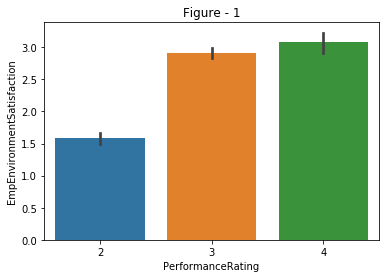

In [15]:
ax = sns.barplot(data['PerformanceRating'], data['EmpEnvironmentSatisfaction'])
ax.set_title('Figure - 1')

Text(0.5,1,'Figure - 2')

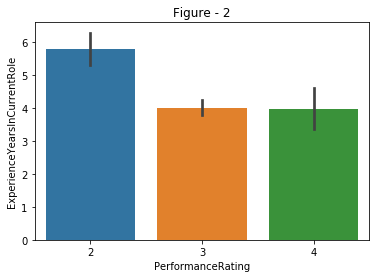

In [16]:
ax = sns.barplot(data['PerformanceRating'], data['ExperienceYearsInCurrentRole'])
ax.set_title('Figure - 2')

Text(0.5,1,'Figure - 3')

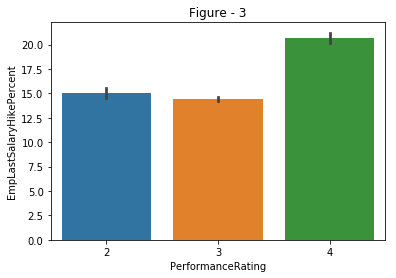

In [17]:
ax = sns.barplot(data['PerformanceRating'], data['EmpLastSalaryHikePercent'])
ax.set_title('Figure - 3')

Text(0.5,1,'Level Wise Performance in each Department (Figure - 4)')

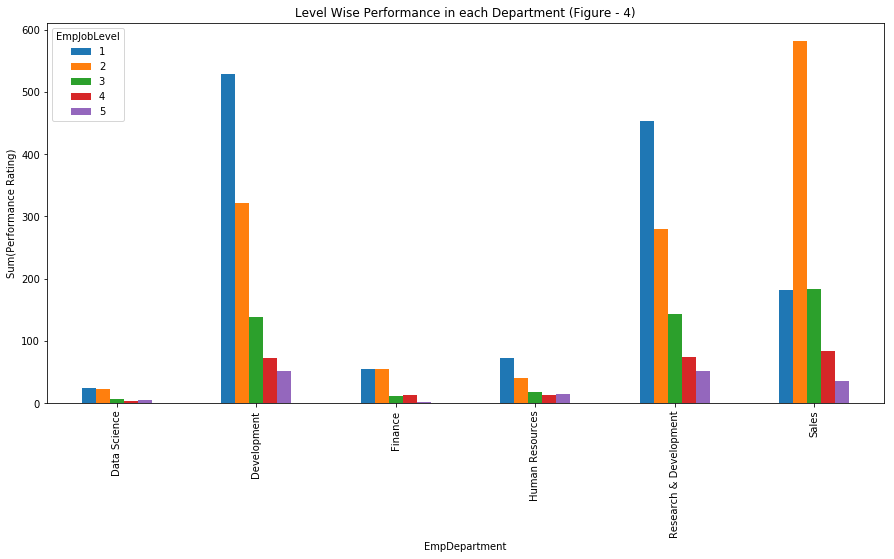

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(by=['EmpDepartment','EmpJobLevel']).sum()['PerformanceRating'].unstack().plot(kind = 'bar',ax=ax)
ax.set_ylabel('Sum(Performance Rating)')
ax.set_title('Level Wise Performance in each Department (Figure - 4)')